In [1]:
import matplotlib, mplcairo
print('Default backend: ' + matplotlib.get_backend()) 
matplotlib.use("module://mplcairo.macosx")
print('Backend is now ' + matplotlib.get_backend())


Default backend: MacOSX
Backend is now module://mplcairo.macosx


In [2]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


import warnings

warnings.filterwarnings("ignore", message="Glyph")
warnings.filterwarnings("ignore", message="Requested glyph")


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Load Apple Color Emoji font 
prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')


try:
    descriptions = pd.read_csv('emoji_sentiment_tweets_descriptions.csv.gz', compression='gzip')
    descriptions = descriptions.set_index('Unnamed: 0')
    descriptions.index.name="Emojis"
except:
    df = pd.read_csv('emoji_sentiment_tweets.csv.gz', compression='gzip')
    emojis = list(df.columns[4:])
    descriptions = df[df.columns[4:]].describe()
    descriptions = descriptions.transpose()
    descriptions = descriptions.dropna()
    remove_rows = ["]", "[", "'"]
    for i in remove_rows:
        descriptions = descriptions.drop(index=i)

    descriptions = descriptions[~(descriptions['count'] <= 200)]  

try:
    print(df.head(5))
except:
    print(descriptions.head(5))

          count      mean       std       min       25%       50%       75%  \
Emojis                                                                        
😭       52995.0 -0.000090  0.004057 -0.044398 -0.002308  0.000000  0.001138   
❤️      30882.0  0.002728  0.004476 -0.049325  0.000584  0.002164  0.004853   
😅       10307.0  0.000192  0.003880 -0.034490 -0.002460  0.000000  0.001460   
💪        6295.0  0.000977  0.003821 -0.034714  0.000000  0.000102  0.002925   
😁        4773.0  0.001947  0.004082 -0.026777  0.000000  0.000646  0.003996   

             max  
Emojis            
😭       0.046244  
❤️      0.046244  
😅       0.015544  
💪       0.031742  
😁       0.041883  


In [3]:
# descriptions
descriptions.sort_values(by='count', ascending=False)



,count,mean,std,min,25%,50%,75%,max
Emojis,,,,,,,,
😂,101947.0,0.000326,2.937964e-03,-0.054222,0.000000,0.000000,0.001374,0.046244
,79818.0,0.002093,4.337387e-03,-0.046747,0.000000,0.000818,0.003715,0.032560
",",79818.0,0.002093,4.337387e-03,-0.046747,0.000000,0.000818,0.003715,0.032560
️,61194.0,0.001783,3.810180e-03,-0.049325,0.000000,0.000619,0.003228,0.046244
😭,52995.0,-0.000090,4.057397e-03,-0.044398,-0.002308,0.000000,0.001138,0.046244
❤,46516.0,0.001835,3.879965e-03,-0.049325,0.000000,0.000631,0.003316,0.046244
🔥,38419.0,0.001487,3.504136e-03,-0.034715,0.000000,0.000709,0.003236,0.035813
❤️,30882.0,0.002728,4.476105e-03,-0.049325,0.000584,0.002164,0.004853,0.046244
🤣,24749.0,0.002018,4.321778e-03,-0.053859,-0.000002,0.000000,0.006001,0.025591


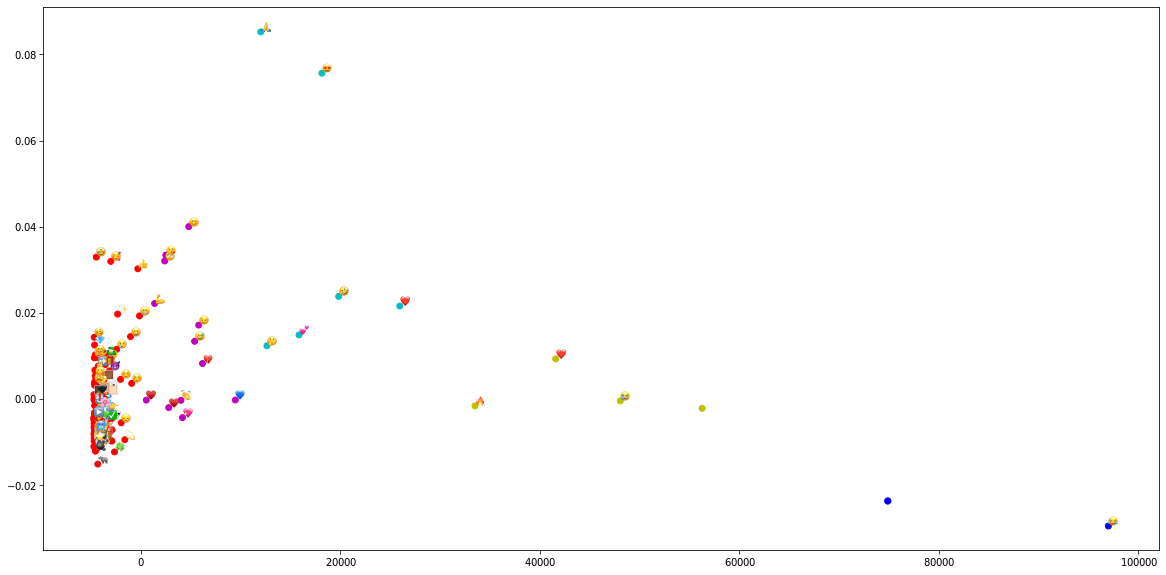

In [4]:
%matplotlib inline
colors = ["r", "b", "c", "y", "m" ]
kmeans = KMeans(n_clusters = len(colors), init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(descriptions)


pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(descriptions)


x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
for i, txt in enumerate(list(descriptions.index)):
    ax.annotate(txt, (x_axis[i], y_axis[i]), fontproperties=prop)


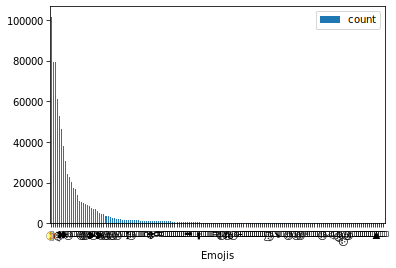

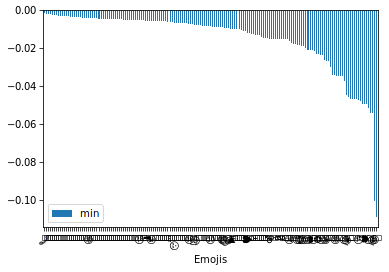

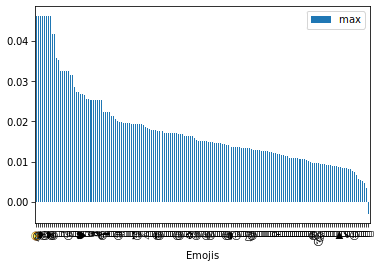

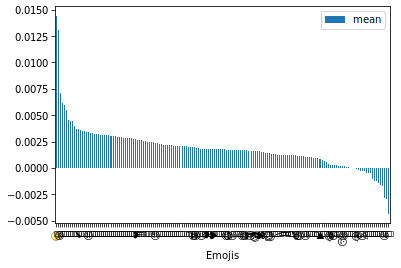

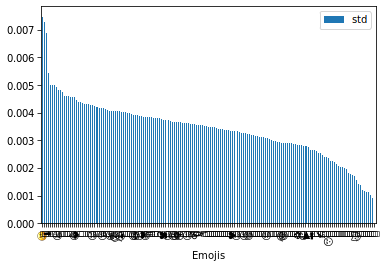

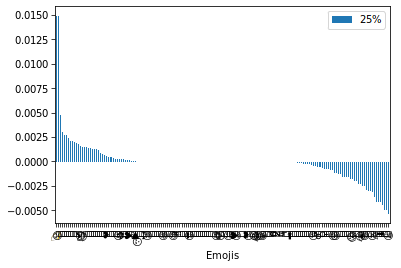

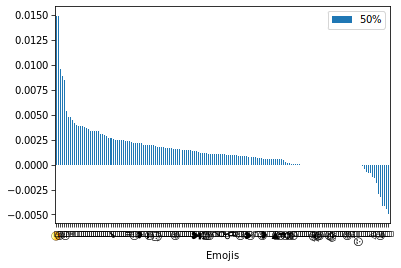

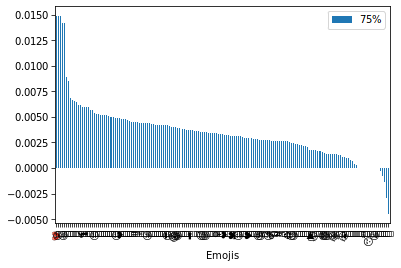

In [10]:
%matplotlib inline

for cols in ["count", "min", "max", "mean", "std", "25%","50%","75%" ]:  
    ax = descriptions.sort_values(by=cols, ascending=False)[[cols]].plot(kind='bar')
    ax.set_xticklabels(list(descriptions.sort_values(by=cols, ascending=False)[[cols]].index), fontproperties=prop)
    plt.show()
    

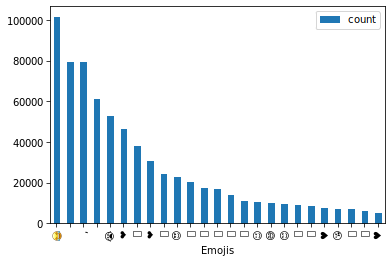

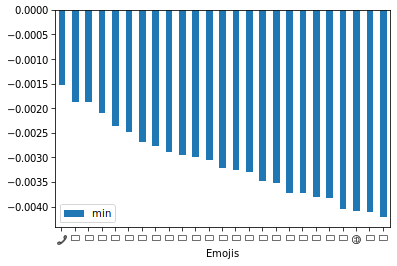

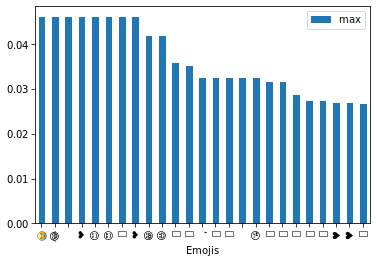

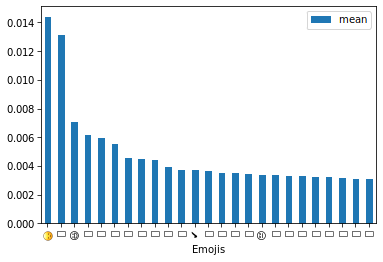

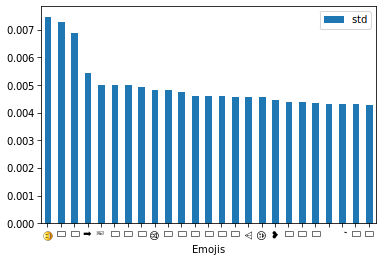

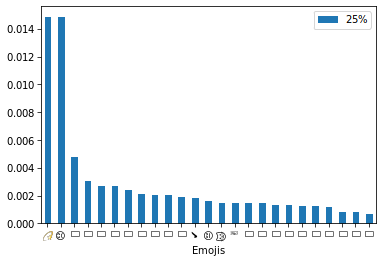

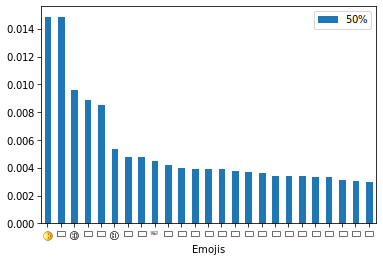

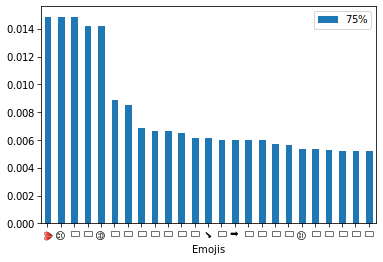

In [6]:
%matplotlib inline

for cols in ["count", "min", "max", "mean", "std", "25%","50%","75%" ]:  
    ax = descriptions.sort_values(by=cols, ascending=False)[[cols]][:25].plot(kind='bar')
    ax.set_xticklabels(list(descriptions.sort_values(by=cols, ascending=False)[[cols]][:25].index), fontproperties=prop)
    plt.show()
    



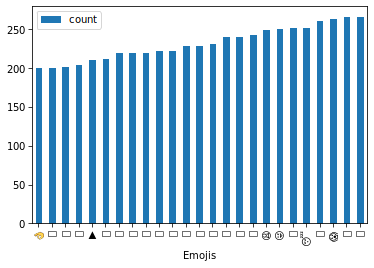

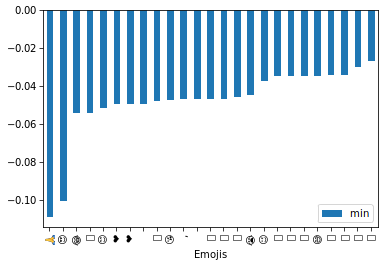

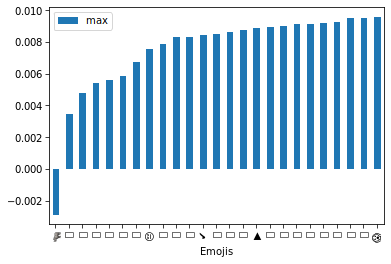

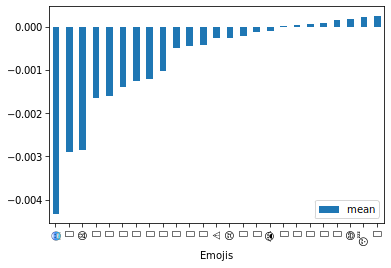

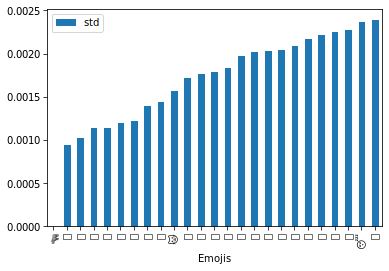

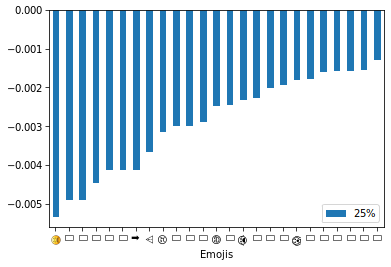

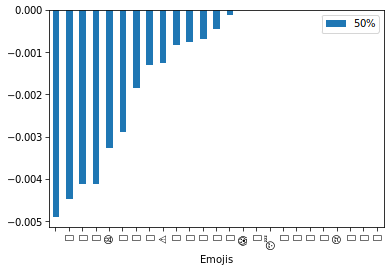

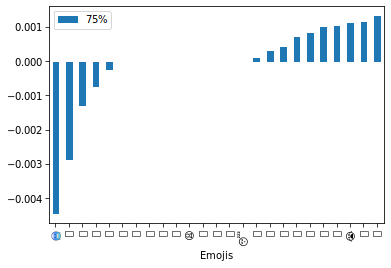

In [7]:
%matplotlib inline
for cols in ["count", "min", "max", "mean", "std", "25%","50%","75%" ]:
    ax = descriptions.sort_values(by=cols, ascending=True)[[cols]][:25].plot(kind='bar')
    ax.set_xticklabels(list(descriptions.sort_values(by=cols, ascending=True)[[cols]][:25].index), fontproperties=prop)
    plt.show()
    


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1502: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


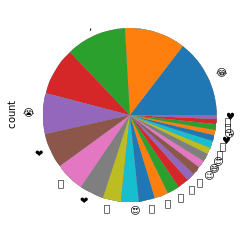

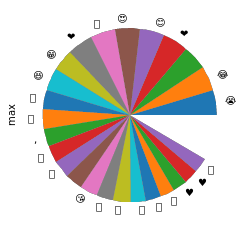

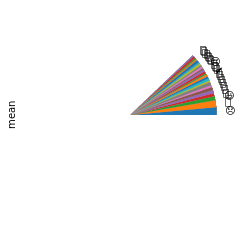

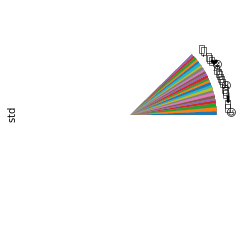

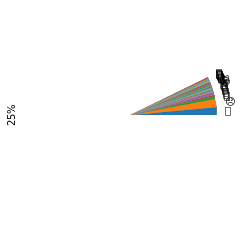

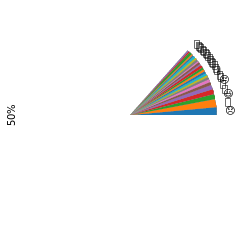

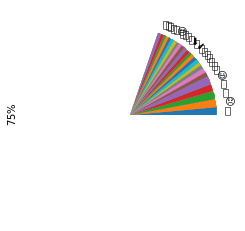

In [8]:
%matplotlib inline
for cols in  ["count", "max", "mean", "std", "25%","50%","75%" ]:

    descriptions.sort_values(by=cols, ascending=False)[[cols]][:25].plot(kind='pie',subplots=True, legend=None);



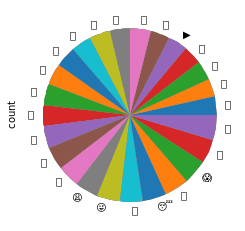

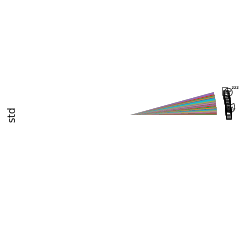

In [9]:
for cols in ["count", "min", "max", "mean", "std", "25%","50%","75%" ]:
    try:
        descriptions.sort_values(by=cols, ascending=True)[[cols]][:25].plot(kind='pie',subplots=True, legend=None);
    except:
        pass